In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [51]:
data = pd.read_csv("board_data.csv")
data.head()

def numeric_board(x):
    board_lst = x["board"].replace("[", "").replace("]", "").replace("'", "").replace("\n", "").strip().split(" ")
    return np.array(board_lst).reshape(3, 3).astype("<U4")

data["board"] = data.apply(numeric_board, axis=1)

data.drop(data.columns[0], axis=1, inplace=True)

In [52]:
data.head()

,board,best_score,is_solvable
0,"[[k, r, a], [g, d, b], [e, i, j]]",117,1
1,"[[n, k, q], [e, t, a], [p, k, n]]",80,0
2,"[[d, e, s], [y, g, q], [t, u, b]]",78,1
3,"[[a, e, t], [b, k, x], [n, q, g]]",75,0
4,"[[q, t, a], [r, z, r], [f, s, c]]",70,0


In [169]:
data["modified_score"] = data["best_score"] + 500*data["is_solvable"]

## Possible Features

1. prop_vowels: proportion of vowels contained in the board
2. num_qs: number of q's 
3. num_xs: number of x's

In [67]:
v = ["a", "e", "i", "o", "u"]

def prop_vowels(x):
    indices = np.where(np.isin(x["board"], v))
    num_tiles = np.sum(x["board"]!="None")
    return len(indices[0])/num_tiles

data["prop_vowels"] = data.apply(prop_vowels, axis=1)

In [75]:
def num_qs(x):
    return np.sum(x["board"]=="q")

def num_xs(x):
    return np.sum(x["board"]=="x")

data["num_qs"] = data.apply(num_qs, axis=1)
data["num_xs"] = data.apply(num_xs, axis=1)

<Axes: >

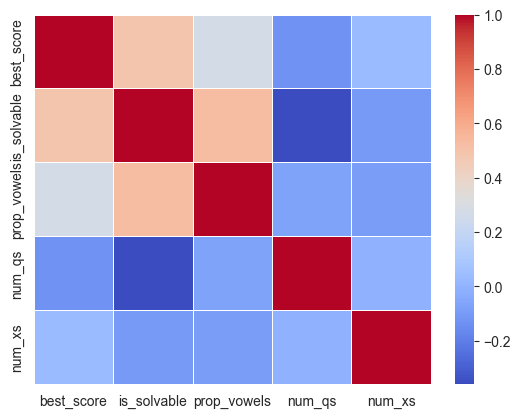

In [83]:
plt.figure();
sns.heatmap(data[["best_score", "is_solvable", "prop_vowels", "num_qs", "num_xs"]].corr(),
           cmap="coolwarm", linewidths=0.5)

In [84]:
data[["best_score", "is_solvable", "prop_vowels", "num_qs", "num_xs"]].corr()

,best_score,is_solvable,prop_vowels,num_qs,num_xs
best_score,1.000000,0.486477,0.268543,-0.130688,0.032119
is_solvable,0.486477,1.000000,0.525798,-0.360263,-0.100825
prop_vowels,0.268543,0.525798,1.000000,-0.072854,-0.090972
num_qs,-0.130688,-0.360263,-0.072854,1.000000,-0.011242
num_xs,0.032119,-0.100825,-0.090972,-0.011242,1.000000


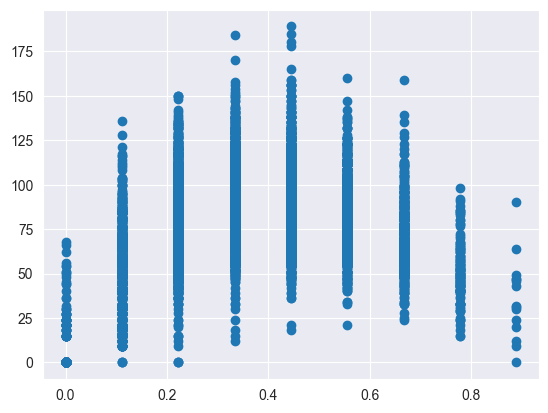

In [93]:
plt.scatter(data["prop_vowels"], data["best_score"])

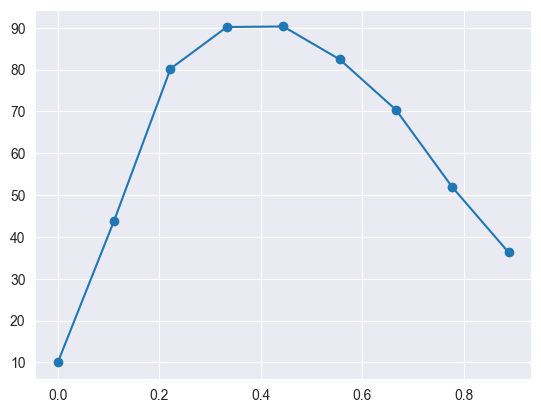

In [177]:
prop_score_lst = [[i, np.mean(df["best_score"])] for i, df in data.groupby("prop_vowels")]
n1 = np.array(prop_score_lst)
plt.scatter(n1[:, 0], n1[:, 1]);
plt.plot(n1[:, 0], n1[:, 1]);

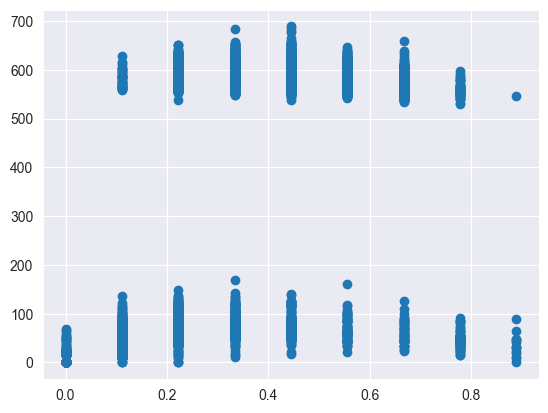

In [173]:
plt.scatter(data["prop_vowels"], data["modified_score"])

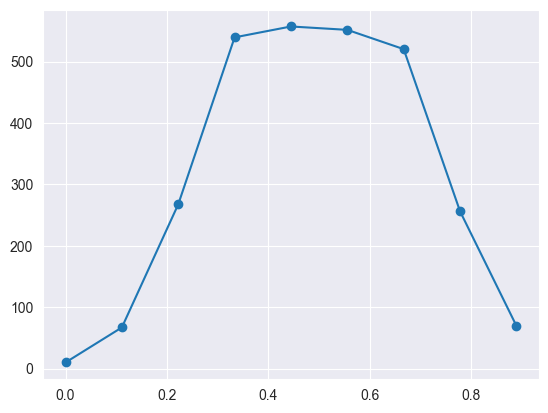

In [189]:
prop_score_lst = [[i, np.mean(df["modified_score"])] for i, df in data.groupby("prop_vowels")]
n2 = np.array(prop_score_lst)
plt.figure();
plt.scatter(n2[:, 0], n2[:, 1]);
plt.plot(n2[:, 0], n2[:, 1]);
plt.savefig("distribution_vowels.pdf")

In [188]:
np.sum(n2[:, 1][3:-3])/np.sum(n2[:, 1])

0.5806209090622902

In [221]:
n2_ = (-1)*n2[:, 1]**(1/8)

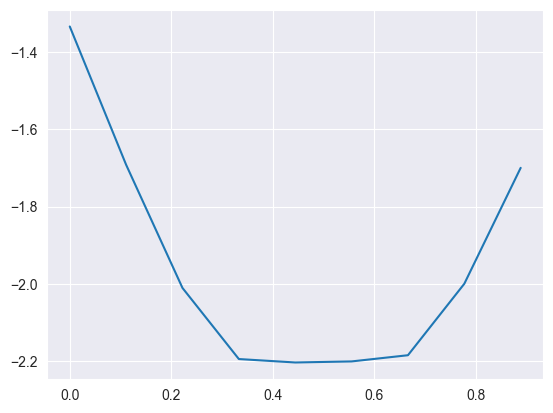

In [222]:
plt.plot(n2[:, 0], n2_)

In [220]:
for i in range(1, 8):
    n2_ = (-1)*n2[:, 1]**(1/i)
    print(np.array(pd.DataFrame([n2[:, 0], n2_]).T.corr())[0, 1])

-0.2612674860054444
-0.3321230471399739
-0.36374033546498663
-0.3806688320174147
-0.39105200669733664
-0.3980287445713313
-0.4030250115017427
